<a href="https://colab.research.google.com/github/DAHYUN-HAN/Machine_Learning/blob/master/ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모델을 학습한다는것 => 파라미터 값을 구하는것 => 잘 맞는 파라미터 값.  
**Training a model** means **setting its parameters so that the model best fits the training set**. 

잘 맞는지 확인하는 방법 = MRE 또는 MSE. MSE를 더 많이 씀.  

For this purpose, we first need **a measure of how well (or poorly) the model fits the training data**. 

MSE가 낮아지도록 세타를 계속 수정
Therefore, to train a Linear Regression model, we need to **find the value of $\boldsymbol{\theta}$ that minimizes the RMSE**. 



closed-form solution

##Normal Equation

$$
\hat{\boldsymbol{\theta}}=(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T \textbf{y}
$$

In [15]:
import numpy as np
np.random.seed(42)

X = 2 * np.random.rand(100,1)
print(X.shape)

y = 4+3*X + np.random.randn(100,1)#노이즈 추가
print(y.shape)

(100, 1)
(100, 1)


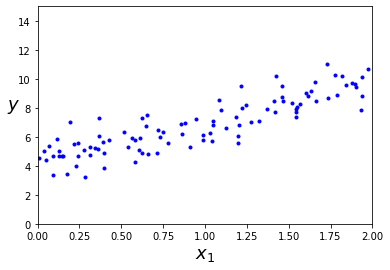

In [16]:
import matplotlib.pyplot as plt

plt.plot(X,y, "b.")
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [0]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [18]:
#정답은 4랑 3
theta_best

array([[4.21509616],
       [2.77011339]])

In [19]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [20]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [21]:
y_predict = X_new_b.dot(theta_best)#예측
y_predict

array([[4.21509616],
       [9.75532293]])

 추론하는데에 있어서 시간이 엄청나게 빠르다는 장점이 있음.  
 노이즈에 대한 모델링이 필요하다는 단점이 있어서 노이즈를 잡기가 어렵다는 약점은 있다.  

피처의 수와 파라미터의 수는 같다.
피처의 수는 열의 수.
피처가 만약에 1이다 하면 파라미터는 1인것.
이 1을 구하기 위해서는 독립적인 식이 1개 필요.

n=2 이고, m=100 일때
100개의 독립적인 샘플이 있는데, 파라미터 2개 가지고 에러가 없는 모델을 만들 수는 없다.
n=2 일때 샘플이 2개면 완벽한 모델을 만들 수 있음. 

에러를 다 제곱해서 1/100로 나눠줬을 때 가장 작은게 prediction.
내가 구해야 할 미지수보다 식이 많은 경우 mse가 가장 작도록 만드는게 nomal equation

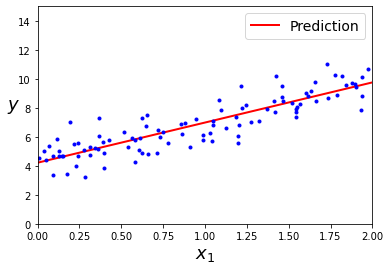

In [22]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", linewidth=2, label='Prediction')
plt.plot(X, y, "b.")
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.legend(loc='best', fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[4.21509616] [[2.77011339]]


array([[4.21509616],
       [9.75532293]])

The **LinearRegression** class is based on the `scipy.linalg.lstsq()` function (the name stands for “**least squares**”), which you could call directly: 
공식이 똑같기 때문에 값이 거의 비슷하게 나온다.(내용적으로 동일)  
그런데 역행렬을 구하는 방법이 여러개이기 때문에 거기서 오차가 약간 발생할 수 있다.

In [24]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)#1e-6 = 10^-6/0.000001
print(rank, s)
theta_best_svd

2 [14.37020392  4.11961067]


array([[4.21509616],
       [2.77011339]])

 $\hat{\boldsymbol{\theta}}=\textbf{X}^+\textbf{y}$, where $\textbf{X}^+$ is the pseudoinverse of $\textbf{X}$

In [25]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

# Gradient Descent
minimum 기울기 = 0  

* it measures **the local gradient of the error function** with regard to the parameter vector $\boldsymbol{\theta}$, and 
* it goes in the direction of descending gradient. 
* Once the gradient is zero, you have reached a minimum


An important parameter in Gradient Descent is **the size of the steps**, determined by the **learning rate** *hyperparameter*. 

This diagram also illustrates the fact that **training a model** means **searching for a combination of model parameters that minimizes a cost function (over the training set)**. 

$$
\frac{\partial }{\partial \theta_j}\text{MSE}(\boldsymbol{\theta})=\frac{2}{m}\sum^m _{i=1}\left( \boldsymbol{\theta}^T \textbf{x}^{(i)}-y^{(i)}\right)x_j^{(i)} 
$$

In [0]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [27]:
theta

array([[4.21509616],
       [2.77011339]])

In [29]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

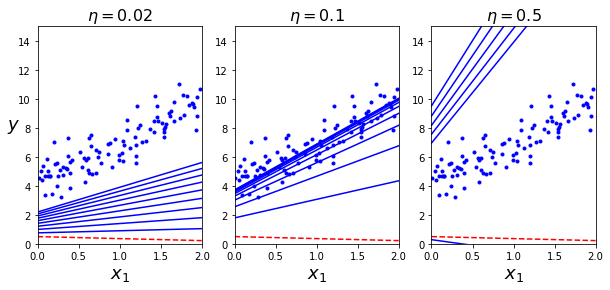

In [30]:
def plot_gradient_descent(theta, eta, theta_path=None):

  m = len(X_b)
  plt.plot(X,y, "b.")
  n_iter = 1000

  for i in range(n_iter):
    if i < 10:
      y_predict = X_new_b.dot(theta)
      style= 'b-' if i > 0 else 'r--' #start > red!
      plt.plot(X_new,y_predict,style)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - gradients *eta
    if theta_path is not None:
      theta_path.append(theta)
  plt.xlabel('$x_1$', fontsize=18)
  plt.axis([0,2,0,15])
  plt.title('$\eta= {}$'.format(eta), fontsize=16)


np.random.seed(42)
theta = np.random.randn(2,1) # randominitialization

theta_path_bgd = []

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$',fontsize=18, rotation=0)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path = theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

plt.show()

**the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time.**

시간이 오래 걸리는건 전혀 좋은게 아니다.

**learning schedule**.


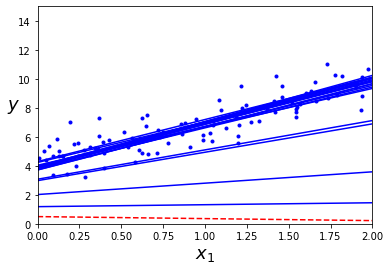

In [31]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20:          
      y_predict = X_new_b.dot(theta)
      style = "b-" if i > 0 else "r--" 
      plt.plot(X_new, y_predict, style) 

    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

    theta_path_sgd.append(theta)        

plt.plot(X, y, "b.")                            
plt.xlabel("$x_1$", fontsize=18)                    
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                           
plt.show()                                        

In [32]:
theta

array([[4.21076011],
       [2.74856079]])

In [33]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [34]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

## Mini-batch Gradient Descent

In [0]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [36]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [0]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

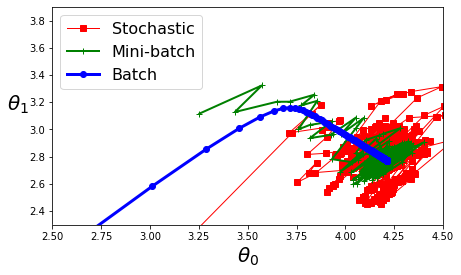

In [38]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

Batch => 100명이 동의 한 길

| Algorithm	| Large $m$ |	Out-of-core support |	Large $n$ |	Hyperparams	 | Scaling required |Scikit-Learn |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Normal Equation | Fast | No | Slow | 0 | No |N/A|
| SVD | Fast | No | Slow | 0 | No |LinearRegression|
| Batch GD | Slow | No | Fast | 2 | Yes |SGDRegressor|
| Stochastic GD | Fast | Yes | Fast | $\ge2$ | Yes |SGDRegressor|
| Mini-batch GD | Fast | Yes | Fast | $\ge2$ | Yes |SGDRegressor|


Batch GD는 샘플 수에 취약하다.